## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
           Path('./Resources/bitstamp.csv'),
           index_col = "Timestamp",
           parse_dates = True,
           infer_datetime_format = True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
           Path("./Resources/coinbase.csv"),
           index_col = "Timestamp",
           parse_dates = True,
           infer_datetime_format = True)

In [56]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,6934.00,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE

bitstamp.dtypes

bitstamp.loc[:,"Close"]= bitstamp.loc[:,"Close"].str.replace("$"," ")
bitstamp.head()

/Users/ksenia/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp.loc[:, "Close"] = bitstamp.loc[:,"Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp.duplicated().sum()
#No duplicated values

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE

# drops all NaNs or missing values in the DataFrame
coinbase.isnull().sum()
coinbase = coinbase.dropna()

In [11]:
# str.replace function removes the dollar sign, $

coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$"," ")
#coinbase.head()

/Users/ksenia/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Convert the Close data type to a float
coinbase.loc[:,"Close"]= coinbase.loc[:,"Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [13]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()
coinbase = coinbase.drop_duplicates()

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
from IPython.display import display, HTML


# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [16]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp.describe(include ='all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [17]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase.describe(include ='all')

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


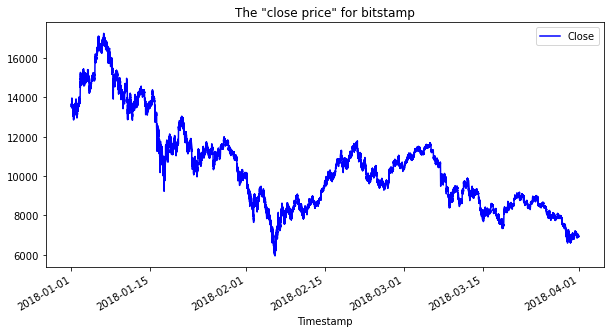

In [18]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(legend = True,figsize=(10,5),title='The "close price" for bitstamp', color= 'blue')

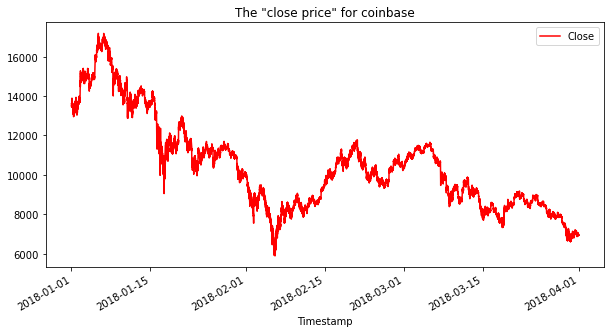

In [19]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced.plot(legend = True, figsize = (10,5),color='red', title='The "close price" for coinbase')

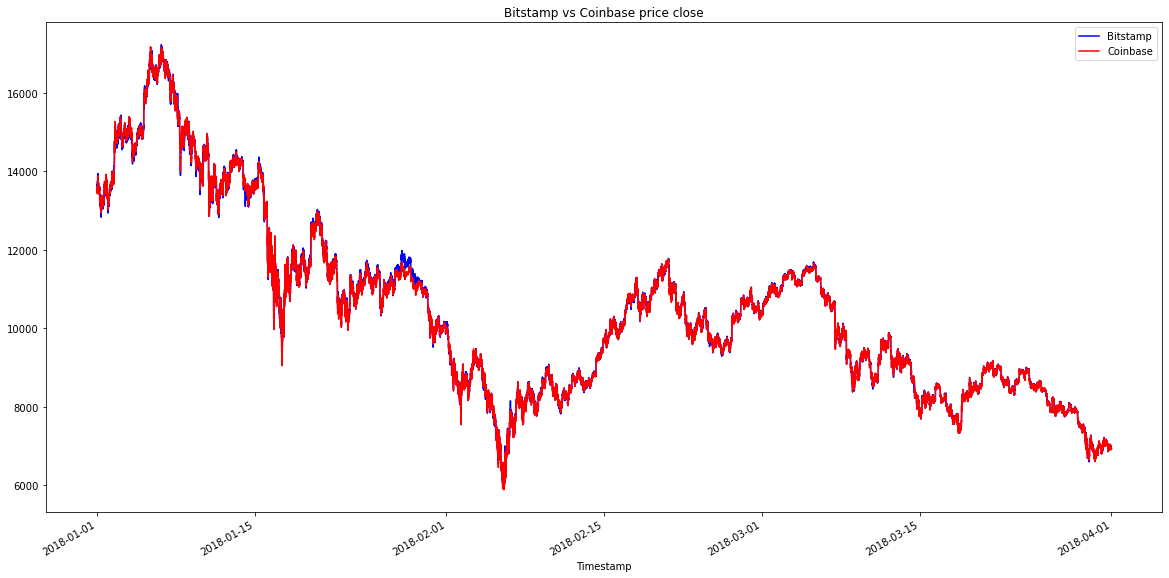

In [20]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced.plot(legend=True, figsize=(20,10), color= 'blue', label= 'Bitstamp')
coinbase_sliced.plot(legend=True, figsize=(20,10),title= "Bitstamp vs Coinbase price close", color='red', label="Coinbase")

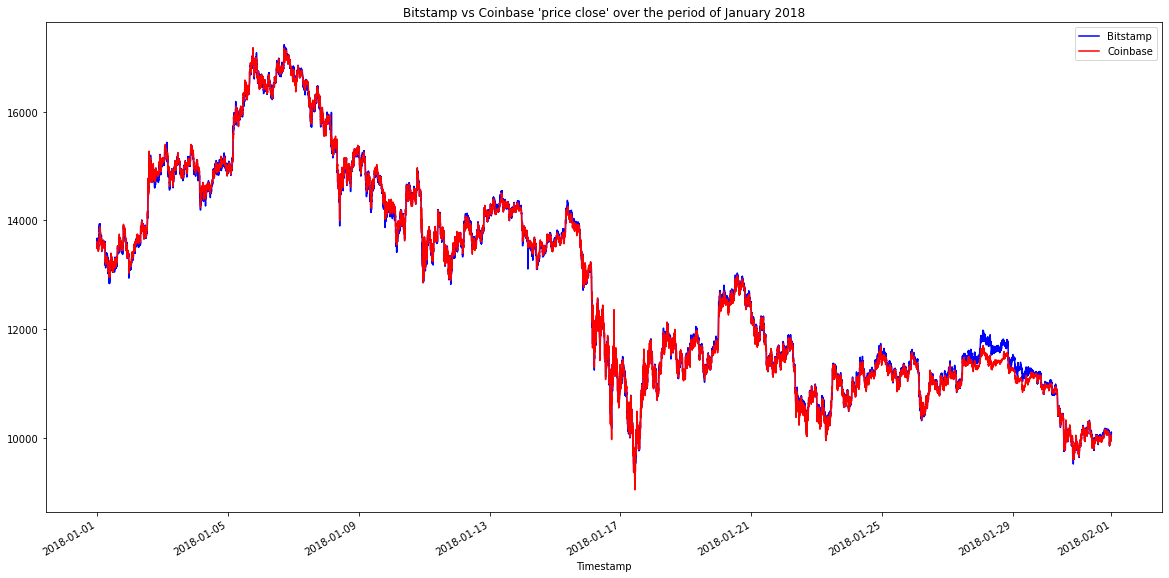

In [21]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
early_month_bitstamp= bitstamp_sliced.loc['2018-1-1':'2018-1-31']
early_month_coinbase=coinbase_sliced.loc['2018-1-1':'2018-1-31']
early_month_bitstamp.plot(legend=True, figsize=(20,10),title= "Bitstamp vs Coinbase 'price close' over the period of January 2018", color='blue', label="Bitstamp")
early_month_coinbase.plot(legend=True, figsize=(20,10), color= 'red', label= 'Coinbase')

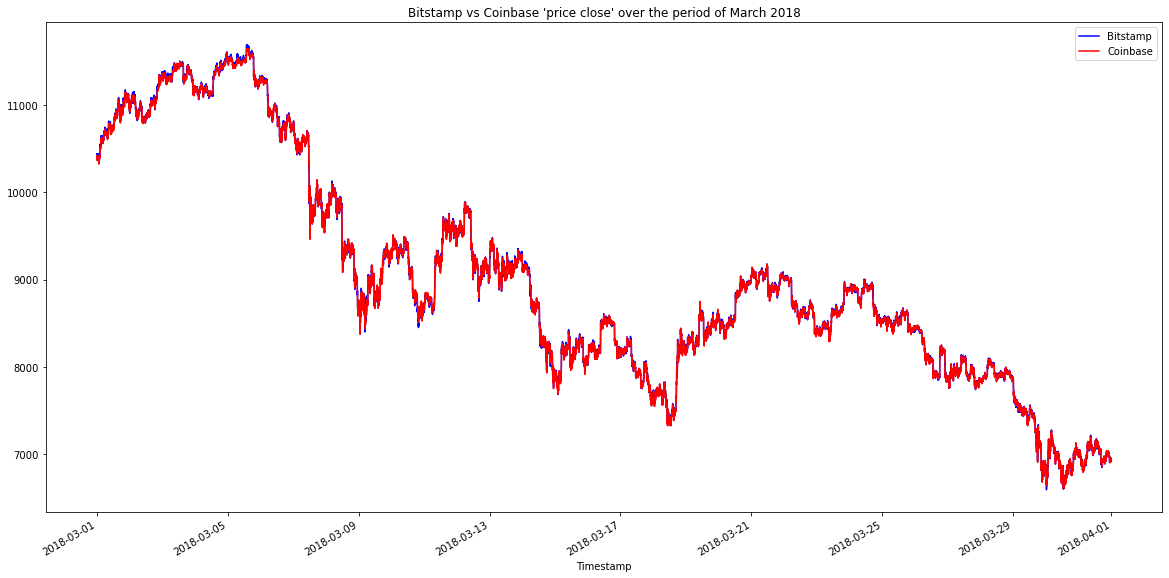

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
later_month_bitstamp= bitstamp_sliced.loc['2018-3-1':'2018-3-31']
later_month_coinbase=coinbase_sliced.loc['2018-3-1':'2018-3-31']
later_month_bitstamp.plot(legend=True, figsize=(20,10),title= "Bitstamp vs Coinbase 'price close' over the period of March 2018", color='blue', label="Bitstamp")
later_month_coinbase.plot(legend=True, figsize=(20,10), color= 'red', label= 'Coinbase')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE
Based on the above visualisations, we can say that that as time progressed the degree of spread hasn't change much and the BTC remained highly volatile.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

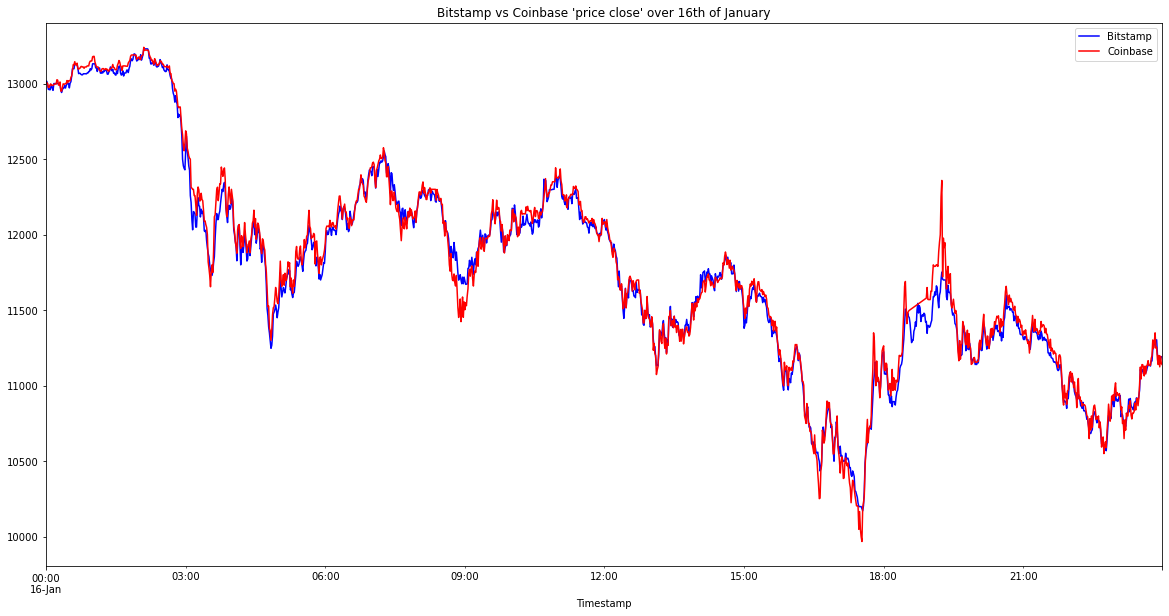

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
jan16th_bitstamp= bitstamp_sliced.loc['2018-1-16']
jan16th_coinbase=coinbase_sliced.loc['2018-1-16']
jan16th_bitstamp.plot(legend=True, figsize=(20,10),title= "Bitstamp vs Coinbase 'price close' over 16th of January", color='blue', label="Bitstamp")
jan16th_coinbase.plot(legend=True, figsize=(20,10), color= 'red', label= 'Coinbase')

In [24]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = jan16th_coinbase.loc['2018-1-16'] - jan16th_bitstamp.loc['2018-1-16']

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe(include='all')

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

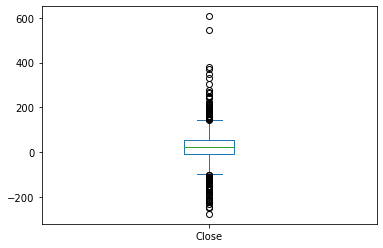

In [25]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind='box')

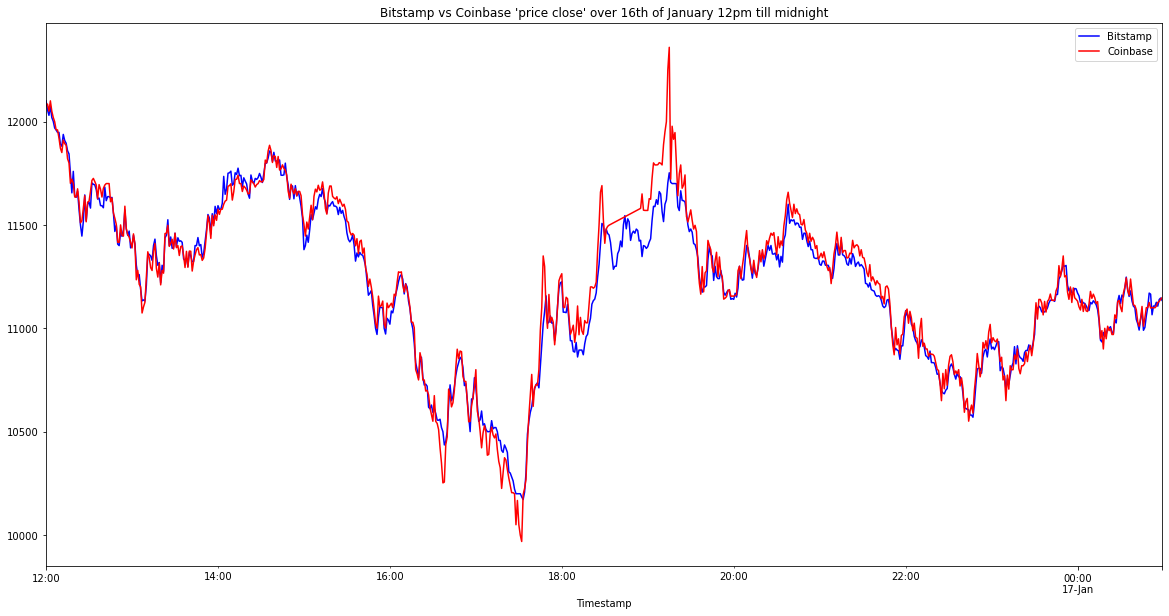

In [26]:
#Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset.

#Be sure that the plots include the parameters legend, figsize, title, color and label

#YOUR CODE HERE

jan16th_bitstamp= bitstamp_sliced.loc['2018-1-16 12' : '2018-1-17 00'] 
jan16th_coinbase=coinbase_sliced.loc['2018-1-16 12' : '2018-1-17 00'] 
jan16th_bitstamp.plot(legend=True, figsize=(20,10),title= "Bitstamp vs Coinbase 'price close' over 16th of January 12pm till midnight", color='blue', label="Bitstamp") 
jan16th_coinbase.plot(legend=True, figsize=(20,10), color= 'red', label= 'Coinbase')

In [27]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
feb15th_bitstamp= bitstamp_sliced.loc['2018-2-15']
feb15th_coinbase=coinbase_sliced.loc['2018-2-15']

arbitrage_spread_middle = feb15th_coinbase.loc['2018-2-15'] - feb15th_bitstamp.loc['2018-2-15']
arbitrage_spread_middle
# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe(include='all')


count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

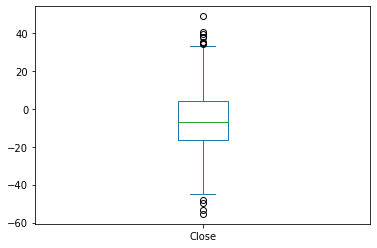

In [28]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind='box')

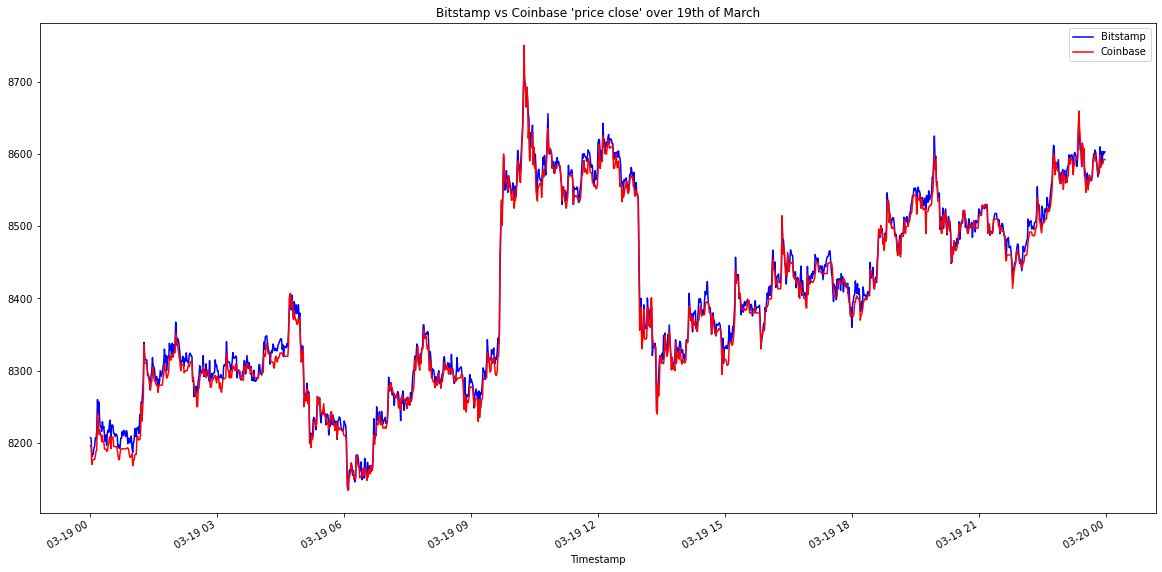

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
mar19th_bitstamp= bitstamp_sliced.loc['2018-3-19']
mar19th_coinbase=coinbase_sliced.loc['2018-3-19']
mar19th_bitstamp.plot(legend=True, figsize=(20,10),title= "Bitstamp vs Coinbase 'price close' over 19th of March", color='blue', label="Bitstamp")
mar19th_coinbase.plot(legend=True, figsize=(20,10), color= 'red', label= 'Coinbase')



In [30]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = mar19th_coinbase.loc['2018-3-19'] - mar19th_bitstamp.loc['2018-3-19']

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe(include='all')

count    1438.000000
mean       -7.760591
std         9.419011
min       -44.710000
25%       -13.720000
50%        -7.690000
75%        -1.472500
max        39.610000
Name: Close, dtype: float64

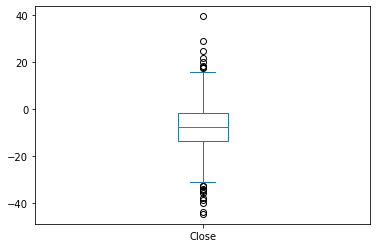

In [31]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [32]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = jan16th_coinbase.loc['2018-1-16'] - jan16th_bitstamp.loc['2018-1-16']
arbitrage_spread_early.describe()

count    699.000000
mean      24.306981
std       73.612704
min     -247.610000
25%      -17.140000
50%       18.520000
75%       53.025000
max      606.800000
Name: Close, dtype: float64

In [33]:
arbitrage_spread_middle = feb15th_coinbase.loc['2018-2-15'] - feb15th_bitstamp.loc['2018-2-15']
arbitrage_spread_middle.describe()

count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

In [34]:
arbitrage_spread_late = mar19th_coinbase.loc['2018-3-19'] - mar19th_bitstamp.loc['2018-3-19']
arbitrage_spread_late.describe()

count    1438.000000
mean       -7.760591
std         9.419011
min       -44.710000
25%       -13.720000
50%        -7.690000
75%        -1.472500
max        39.610000
Name: Close, dtype: float64

In [35]:
arbitrage_spread_early[arbitrage_spread_early > 0].describe(include='all')

count    447.000000
mean      58.613826
std       66.370146
min        0.020000
25%       20.815000
50%       42.040000
75%       70.340000
max      606.800000
Name: Close, dtype: float64

In [36]:
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe(include='all')

count    466.000000
mean      11.267489
std        8.653952
min        0.010000
25%        4.372500
50%        9.795000
75%       15.797500
max       48.800000
Name: Close, dtype: float64

In [37]:
arbitrage_spread_late[arbitrage_spread_late > 0].describe(include='all')

count    282.000000
mean       5.104078
std        5.093299
min        0.010000
25%        1.532500
50%        3.725000
75%        6.995000
max       39.610000
Name: Close, dtype: float64

# 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [38]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] /jan16th_bitstamp.loc['2018-1-16'] 
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] /feb15th_coinbase.loc['2018-2-15']
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] /mar19th_coinbase.loc['2018-3-19']
# Review the spread return DataFrame
# YOUR CODE HERE


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [55]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_late = spread_return_late[spread_return_late > 0.01]
# Print the summary statistics for the profitable_trades DataFrame
profitable_trades = profitable_trades_early.append(profitable_trades_middle).append(profitable_trades_late)
profitable_trades.describe(include='all')


# Review the first five profitable trades
# YOUR CODE HERE

profitable_trades.head()

Timestamp
2018-01-16 15:00:00    0.010702
2018-01-16 17:39:00    0.014794
2018-01-16 17:45:00    0.016346
2018-01-16 17:46:00    0.016892
2018-01-16 17:47:00    0.029920
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [40]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early.describe(include='all')

count    46.000000
mean      0.018494
std       0.008814
min       0.010119
25%       0.012902
50%       0.016238
75%       0.019679
max       0.051633
Name: Close, dtype: float64

In [41]:
profitable_trades_middle.describe(include='all')

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [42]:
profitable_trades_late.describe(include='all')

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [43]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-1-16']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-16 15:00:00    121.79
2018-01-16 17:39:00    157.11
2018-01-16 17:45:00    176.75
2018-01-16 17:46:00    184.39
2018-01-16 17:47:00    329.73
2018-01-16 17:48:00    218.87
2018-01-16 17:51:00    134.38
2018-01-16 18:08:00    126.60
2018-01-16 18:11:00    246.75
2018-01-16 18:13:00    158.11
2018-01-16 18:16:00    112.52
2018-01-16 18:20:00    151.55
2018-01-16 18:25:00    127.38
2018-01-16 18:26:00    191.02
2018-01-16 18:27:00    252.77
2018-01-16 18:28:00    183.00
2018-01-16 18:55:00    154.19
2018-01-16 18:56:00    303.10
2018-01-16 18:57:00    171.31
2018-01-16 18:58:00    173.15
2018-01-16 18:59:00    183.67
2018-01-16 19:00:00    175.00
2018-01-16 19:01:00    210.05
2018-01-16 19:02:00    191.01
2018-01-16 19:03:00    203.38
2018-01-16 19:04:00    210.06
2018-01-16 19:05:00    201.40
2018-01-16 19:06:00    168.31
2018-01-16 19:07:00    191.47
2018-01-16 19:08:00    139.84
2018-01-16 19:09:00    148.00
2018-01-16 19:10:00    225.00
2018-01-16 19:11:00    371.95


In [44]:
# There are no profitable trades for the middle date -15th of Feb 2018

In [45]:
# There are no profitable trades for the later date -19th of March 2018

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [46]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe(include='all')

count     46.000000
mean     210.966957
std      103.783615
min      112.520000
25%      148.887500
50%      183.335000
75%      223.467500
max      606.800000
Name: Close, dtype: float64

In [47]:
#There are no profitable trades for middle and late date.

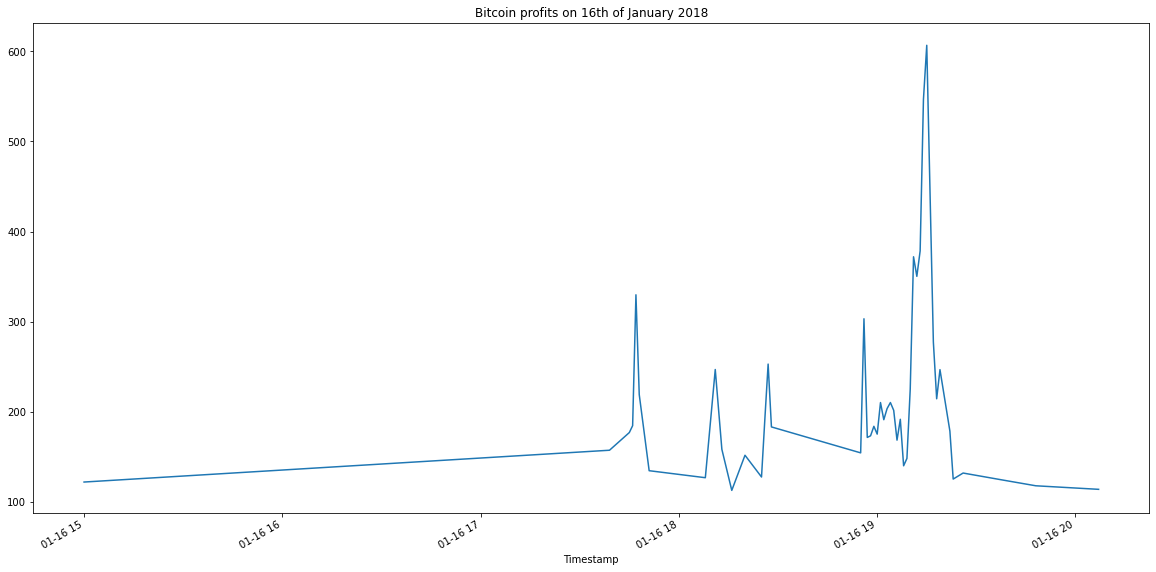

In [48]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(figsize=(20,10),title='Bitcoin profits on 16th of January 2018')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [49]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
profit_sum= profit_per_trade_early.sum()
profit_sum

9704.479999999998

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [50]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

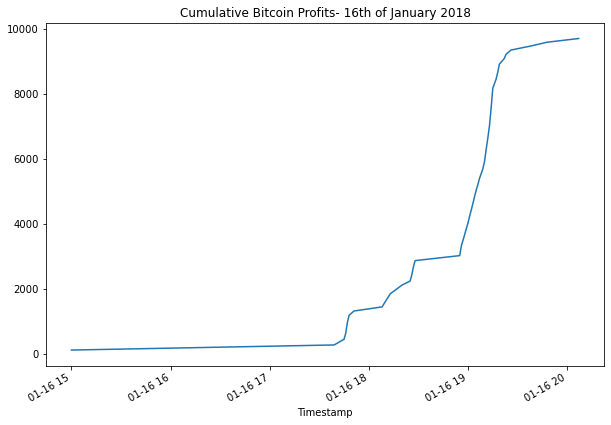

In [51]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(figsize=(10,7), title='Cumulative Bitcoin Profits- 16th of January 2018')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE
After reviewing profit infromation across the three different dates that I have selected, I can state that arbitrage opportunities can be found, although they are very rare. Most of the time, even if there are any price differences between exchange platfroms, they do not cover the trading fees and therefore make arbirtrage operations unprofitable. 
